# Online Retail Analysis

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the Data
data=pd.read_csv('online_retail.csv', encoding= 'unicode_escape')

In [3]:
# Checking top 5 rows
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# Calculate the total sales of each product
TotalAmount = data['Quantity'] * data['Price']
data.insert(loc=6,column='TotalAmount',value=TotalAmount)

In [5]:
# Reshuffling the position of Columns
data=data[['Customer ID','Invoice','StockCode','Quantity','Price','TotalAmount','Description','InvoiceDate','Country']]

In [6]:
data.head()

,Customer ID,Invoice,StockCode,Quantity,Price,TotalAmount,Description,InvoiceDate,Country
0,17850.0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,01/12/2010 8:26,United Kingdom
1,17850.0,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,01/12/2010 8:26,United Kingdom
2,17850.0,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,01/12/2010 8:26,United Kingdom
3,17850.0,536365,84029G,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,01/12/2010 8:26,United Kingdom
4,17850.0,536365,84029E,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,01/12/2010 8:26,United Kingdom


In [7]:
# Data Preprocessing
# Checking null value count
data.isnull().sum()

Customer ID    135080
Invoice             0
StockCode           0
Quantity            0
Price               0
TotalAmount         0
Description      1454
InvoiceDate         0
Country             0
dtype: int64

In [8]:
# Drop all missing values

data.dropna(inplace=True)
data.isnull().sum()

Customer ID    0
Invoice        0
StockCode      0
Quantity       0
Price          0
TotalAmount    0
Description    0
InvoiceDate    0
Country        0
dtype: int64

In [9]:
print("Total numbers of Features: {} and Data points: {}".format(data.shape[1], data.shape[0]))

Total numbers of Features: 9 and Data points: 406830


In [10]:
# Get the list of Countries which runs this Business
output = data['Country'].unique()
for i,each in enumerate(output,start=1):
    print ("{}.{}".format(i,each))

1.United Kingdom
2.France
3.Australia
4.Netherlands
5.Germany
6.Norway
7.EIRE
8.Switzerland
9.Spain
10.Poland
11.Portugal
12.Italy
13.Belgium
14.Lithuania
15.Japan
16.Iceland
17.Channel Islands
18.Denmark
19.Cyprus
20.Sweden
21.Austria
22.Israel
23.Finland
24.Greece
25.Singapore
26.Lebanon
27.United Arab Emirates
28.Saudi Arabia
29.Czech Republic
30.Canada
31.Unspecified
32.Brazil
33.USA
34.European Community
35.Bahrain
36.Malta
37.RSA


In [11]:
# Grouping countries by Total Amount of Sales

country_sales = data.groupby('Country')['Quantity'].sum().sort_values(ascending = False)
country_sales

Country
United Kingdom          4008533
Netherlands              200128
EIRE                     136329
Germany                  117448
France                   109849
Australia                 83653
Sweden                    35637
Switzerland               29778
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16044
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Israel                     3990
Poland                     3653
Canada                     2763
Iceland                    2458
Unspecified                1789
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652
Czech Republic              592


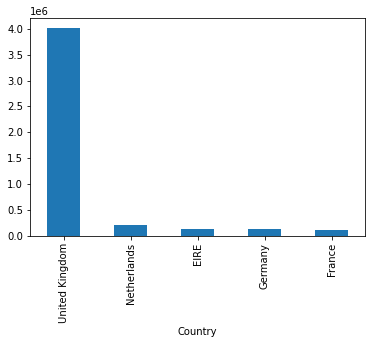

In [12]:
# Top 5 Countries with max number of Sales
country_sales[:5].plot(kind = 'bar')
plt.show()

In [13]:
# total sales in each country
country_sales_value = data.groupby('Country')['Quantity'].sum().sort_values(ascending = False)
country_sales_value.head()

Country
United Kingdom    4008533
Netherlands        200128
EIRE               136329
Germany            117448
France             109849
Name: Quantity, dtype: int64

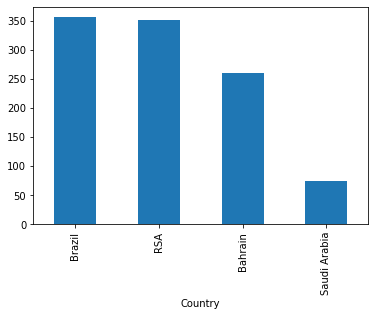

In [14]:
# Bottom 5 Countries with minimum Sales
country_sales[33:].plot(kind = 'bar')
plt.show()

In [15]:
# Adding Year feature to the dataset 

timest =pd.DatetimeIndex(data['InvoiceDate']).year
data['Year'] = timest
data.head()

,Customer ID,Invoice,StockCode,Quantity,Price,TotalAmount,Description,InvoiceDate,Country,Year
0,17850.0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,01/12/2010 8:26,United Kingdom,2010
1,17850.0,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,01/12/2010 8:26,United Kingdom,2010
2,17850.0,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,01/12/2010 8:26,United Kingdom,2010
3,17850.0,536365,84029G,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,01/12/2010 8:26,United Kingdom,2010
4,17850.0,536365,84029E,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,01/12/2010 8:26,United Kingdom,2010


In [16]:
# Adding Time feature to the dataset 
data['Time']= pd.DatetimeIndex(data['InvoiceDate']).hour
data.head()

,Customer ID,Invoice,StockCode,Quantity,Price,TotalAmount,Description,InvoiceDate,Country,Year,Time
0,17850.0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,01/12/2010 8:26,United Kingdom,2010,8
1,17850.0,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,01/12/2010 8:26,United Kingdom,2010,8
2,17850.0,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,01/12/2010 8:26,United Kingdom,2010,8
3,17850.0,536365,84029G,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,01/12/2010 8:26,United Kingdom,2010,8
4,17850.0,536365,84029E,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,01/12/2010 8:26,United Kingdom,2010,8


In [17]:
# Usual Sale time in different Countries 
country_saletime = data.groupby('Country')['Time'].mean().sort_values(ascending = False)
country_saletime

Country
USA                     14.783505
Unspecified             14.774590
United Arab Emirates    14.735294
Bahrain                 13.941176
Spain                   12.857086
United Kingdom          12.818187
Italy                   12.769614
Norway                  12.768877
Denmark                 12.593830
Portugal                12.451351
Sweden                  12.322511
Belgium                 12.241179
Iceland                 12.192308
Austria                 12.172070
Germany                 12.111638
France                  12.077131
EIRE                    12.063995
Lithuania               12.057143
Cyprus                  12.025723
Switzerland             12.011721
RSA                     12.000000
Singapore               11.768559
Netherlands             11.724167
Australia               11.427323
Poland                  11.161290
Channel Islands         11.027704
Finland                 11.007194
Japan                   10.986034
European Community      10.704918
Malta 

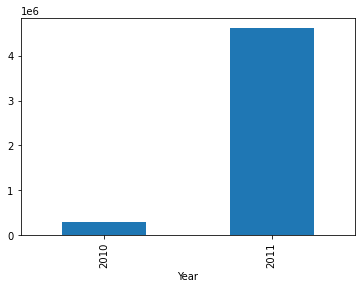

In [18]:
# Total Sales in different years

data.groupby('Year')['Quantity'].sum().plot(kind = 'bar')
plt.show()

In [19]:
# Grouping based on Yearly Sales

country_yearsales = data.groupby('Year')['Quantity'].sum().sort_values(ascending = False)
country_yearsales

Year
2011    4610527
2010     296362
Name: Quantity, dtype: int64

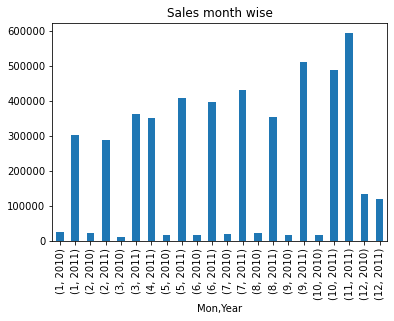

In [20]:
# Monthwise Sales

data['Mon'] = pd.DatetimeIndex(data['InvoiceDate']).month
data.groupby(['Mon','Year'])['Quantity'].sum().plot(kind = 'bar', title = 'Sales month wise')
plt.show()

In [21]:
# Top 10 Products based on Sales 

data.Description.value_counts()[:10]

WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
LUNCH BAG RED RETROSPOT               1358
SET OF 3 CAKE TINS PANTRY DESIGN      1232
POSTAGE                               1197
LUNCH BAG  BLACK SKULL.               1126
PACK OF 72 RETROSPOT CAKE CASES       1080
Name: Description, dtype: int64

In [22]:
# Top Products based on Demand 
disc_sales = data.groupby('Description')['Quantity'].sum().sort_values(ascending = False)
disc_sales

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS      53215
JUMBO BAG RED RETROSPOT                45066
ASSORTED COLOUR BIRD ORNAMENT          35314
WHITE HANGING HEART T-LIGHT HOLDER     34147
PACK OF 72 RETROSPOT CAKE CASES        33409
                                       ...  
PINK POODLE HANGING DECORATION           -12
CRUK Commission                          -16
ASSORTED TUTTI FRUTTI ROUND BOX          -24
Discount                               -1194
ROTATING SILVER ANGELS T-LIGHT HLDR    -1460
Name: Quantity, Length: 3896, dtype: int64

In [23]:
# Top Revenue making countries
country_df = data.groupby('Country')['TotalAmount'].sum().sort_values(ascending = False)
country_df.head()

Country
United Kingdom    6.767873e+06
Netherlands       2.846615e+05
EIRE              2.502852e+05
Germany           2.216982e+05
France            1.967308e+05
Name: TotalAmount, dtype: float64

In [24]:
## Top 10 customers
avg_quan = data[['Quantity','TotalAmount','Country','Invoice','Customer ID']]
avg_sum = avg_quan.groupby(['Country','Customer ID']).sum() 
avg_sum.sort_values('TotalAmount',ascending=False).head(10)

Quantity  TotalAmount
Country        Customer ID                       
Netherlands    14646.0        196719    279489.02
United Kingdom 18102.0         64122    256438.49
               17450.0         69029    187482.17
EIRE           14911.0         77180    132572.62
Australia      12415.0         77242    123725.45
EIRE           14156.0         57025    113384.14
United Kingdom 17511.0         63012     88125.38
               16684.0         49390     65892.08
               13694.0         61803     62653.10
               15311.0         37720     59419.34

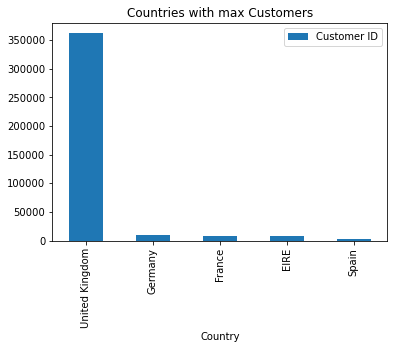

In [25]:
#Countries with max number of customers
cus_id = pd.DataFrame(data.groupby('Country')['Customer ID'].count().sort_values(ascending = False))
cus_id[:5].plot(kind = 'bar', title = 'Countries with max Customers')
plt.show()

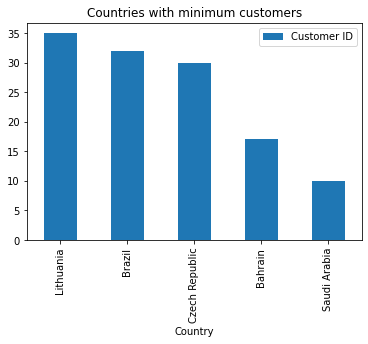

In [26]:
# Countries with least number of customers
cus_id[-5:].plot(kind = 'bar', title = 'Countries with minimum customers')
plt.show()

In [27]:
# Average Sales of each product

avg_sales = data.groupby(['StockCode','Description'])['Quantity','TotalAmount'].mean().sort_values(by = 'Quantity',ascending = False)
avg_sales.head(10)

<ipython-input-27-ab0d3e24cf89>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_sales = data.groupby(['StockCode','Description'])['Quantity','TotalAmount'].mean().sort_values(by = 'Quantity',ascending = False)


,,Quantity,TotalAmount
StockCode,Description,,
47556B,TEA TIME TEA TOWELS,1300.000000,3022.500000
84568,GIRLS ALPHABET IRON ON PATCHES,520.000000,97.200000
84826,ASSTD DESIGN 3D PAPER STICKERS,368.702703,9.145405
18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,325.333333,21.320000
20914,SET/5 RED SPOTTY LID GLASS BOWLS,288.000000,734.400000
16014,SMALL CHINESE STYLE SCISSOR,246.814815,80.291852
23131,MISELTOE HEART WREATH CREAM,240.000000,996.000000
16033,MINI HIGHLIGHTER PENS,210.000000,25.200000
21897,POTTING SHED CANDLE CITRONELLA,201.000000,625.410000


In [36]:
modifed_df = data[['Quantity','TotalAmount','InvoiceDate','Country']].copy()

modifed_df['Month'] = pd.DatetimeIndex(modifed_df['InvoiceDate']).month 
modifed_df['Year'] = pd.DatetimeIndex(modifed_df['InvoiceDate']).year

In [35]:
# Year &month with max Sales
date_df = modifed_df.groupby(['Year','Month']).sum()
total_values = date_df.sort_values('TotalAmount',ascending=False)
total_values

Quantity  TotalAmount
Year Month                       
2011 11       593762  1004792.270
     9        512535   901398.352
     10       488131   820252.470
     7        432711   706117.571
     5        409448   704359.400
     6        398277   663888.110
     3        361459   617490.300
     8        353339   583211.860
     4        351485   556556.961
     1        302399   510308.100
     2        287199   479089.930
2010 12       134520   217975.320
2011 12       119782   198014.470
2010 7         19351    53125.990
     1         24032    46051.260
     2         20855    45775.430
     8         21275    38048.680
     9         16904    37177.850
     10        15388    32005.350
     5         16394    31380.600
     6         16095    30465.080
     3         11548    22598.460

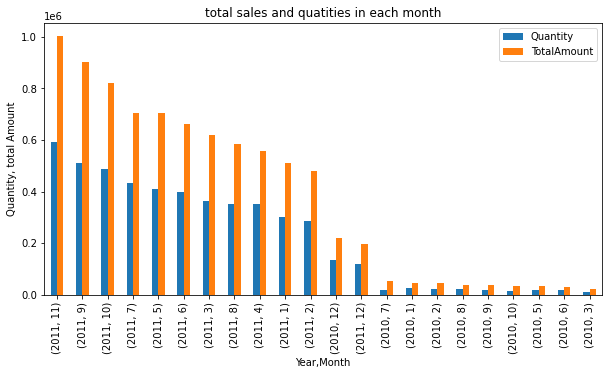

In [30]:
total_values.plot(kind='bar',figsize=(10,5),title='total sales and quatities in each month')
plt.ylabel('Quantity, total Amount')
plt.show()

In [38]:
# monthwise max Sales in each country 
country_monthlysales = modifed_df.groupby('Country').max()
country_monthlysales.sort_values('TotalAmount',ascending=False,inplace=True)
country_monthlysales

,Quantity,TotalAmount,InvoiceDate,Month,Year
Country,,,,,
United Kingdom,80995,168469.60,31/10/2011 9:58,12,2011
Netherlands,2400,4992.00,31/08/2011 11:31,12,2011
France,912,4161.06,31/10/2011 10:42,12,2011
Singapore,288,3949.32,25/01/2011 13:26,10,2011
Japan,2040,3794.40,29/11/2011 15:52,12,2011
EIRE,1440,2365.20,31/10/2011 14:22,12,2011
Australia,1152,1718.40,31/05/2011 11:29,12,2011
Spain,360,1350.00,31/08/2011 9:44,12,2011
Portugal,120,1241.98,31/03/2011 12:36,12,2011


In [32]:
## total sales for each product at each country

df_1=data[['StockCode','Description','Quantity','TotalAmount','Country','InvoiceDate']]

Total_sales_product = df_1.groupby(['Country','StockCode']).sum()

Total_sales_product = Total_sales_product[ (Total_sales_product['Quantity'] > 0) & (Total_sales_product['TotalAmount'] >0) ]
Total_sales_product = Total_sales_product[Total_sales_product['TotalAmount'] >= 100 ]

Total_sales_product

Quantity  TotalAmount
Country        StockCode                          
Australia      15036              600      432.000
               16161P             400      136.000
               20675              216      228.960
               20676              216      228.960
               20677              216      228.960
...                               ...          ...
United Kingdom 90210C              94      115.900
               90210D             104      125.000
               BANK CHARGES        12      165.001
               C2                  30     1475.000
               DOT                 16    11906.360

[5828 rows x 2 columns]

In [33]:
## total sales of product at each month at each country I made filter on total sales >= 100
df_1['Month'] = pd.DatetimeIndex(df_1['InvoiceDate']).month.copy() 
 
df_1 = df_1[ (df_1['Quantity'] > 0) & (df_1['TotalAmount'] >0) ]
df_1 = df_1[df_1['TotalAmount'] >= 100 ]

df_1.groupby(['Country','Month','StockCode','Description']).sum()

<ipython-input-33-c5b611422e90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Month'] = pd.DatetimeIndex(df_1['InvoiceDate']).month.copy()


Quantity  \
Country        Month StockCode Description                                    
Australia      1     21891     TRADITIONAL WOODEN SKIPPING ROPE         144   
                     21915     RED  HARMONICA IN BOX                    720   
                     22451     SILK PURSE BABUSHKA RED                   48   
                     22492     MINI PAINT SET VINTAGE                  1152   
                     22751     FELTCRAFT PRINCESS OLIVIA DOLL           240   
...                                                                     ...   
United Kingdom 12    85123A    WHITE HANGING HEART T-LIGHT HOLDER      1620   
                     85150     LADIES & GENTLEMEN METAL SIGN            336   
                     85152     HAND OVER THE CHOCOLATE   SIGN           288   
                     90057     DIAMANTE RING ASSORTED IN BOX.           240   
                     M         Manual                                     1   

                                                                   TotalAmount  
Country        Month StockCode Description                                      
Australia      1     21891     TRADITIONAL WOODEN SKIPPING ROPE         208.80  
                     21915     RED  HARMONICA IN BOX                    763.20  
                     22451     SILK PURSE BABUSHKA RED                  141.60  
                     22492     MINI PAINT SET VINTAGE                   633.60  
                     22751     FELTCRAFT PRINCESS OLIVIA DOLL           813.60  
...                                                                        ...  
United Kingdom 12    85123A    WHITE HANGING HEART T-LIGHT HOLDER      4219.32  
                     85150     LADIES & GENTLEMEN METAL SIGN            587.52  
                     85152     HAND OVER THE CHOCOLATE   SIGN           440.64  
                     90057     DIAMANTE RING ASSORTED IN BOX.           300.00  
                     M         Manual                                   308.82  

[7139 rows x 2 columns]